# STOCK MARKET PROJECT 
## Geting the Data 
In this notw book I will compare between three saudi stocks Sabic,ynsab,Almsafi . The data has been take from yaho finance , therefore there is some dates now show up. useing pandas
> The analysis is quite tha been used is quite straghi forword and the point of this project is to make a finnancl analysis evevn if it is very simple.

In [2]:
import pandas as pd
import pandas_datareader.data as web 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline
import datetime


In [3]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2020,6,1)
sabic = web.DataReader('2010.SR','yahoo',start,end)
almsafi = web.DataReader('2030.SR','yahoo',start,end)
ynsab = web.DataReader('2290.SR','yahoo',start,end)

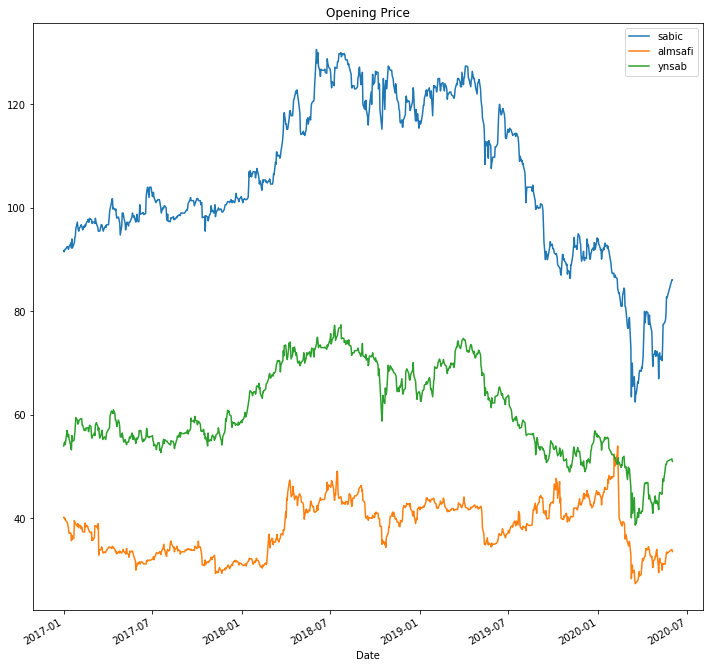

In [4]:
# plot the open price for all of them 

sabic['Open'].plot(label='sabic',figsize=(12,12),title = 'Opening Price')
almsafi['Open'].plot(label='almsafi',figsize=(12,12),title = 'Opening Price')
ynsab['Open'].plot(label='ynsab',figsize=(12,12),title = 'Opening Price');
plt.legend();

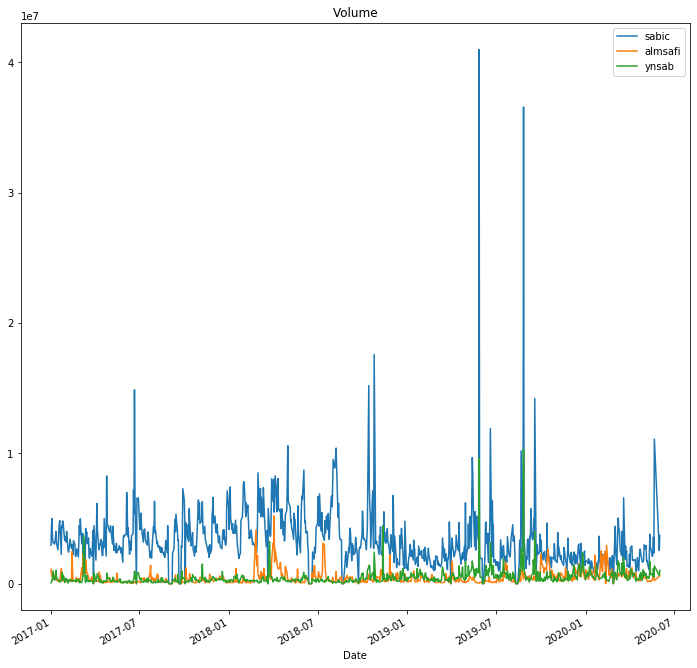

In [5]:
sabic['Volume'].plot(label='sabic',figsize=(12,12),title = 'Volume ')
almsafi['Volume'].plot(label='almsafi',figsize=(12,12),title = 'Volume ')
ynsab['Volume'].plot(label='ynsab',figsize=(12,12),title = 'Volume');
plt.legend();

[Text(0, 0.5, 'Price'), Text(0.5, 1.0, ' vaolume ')]

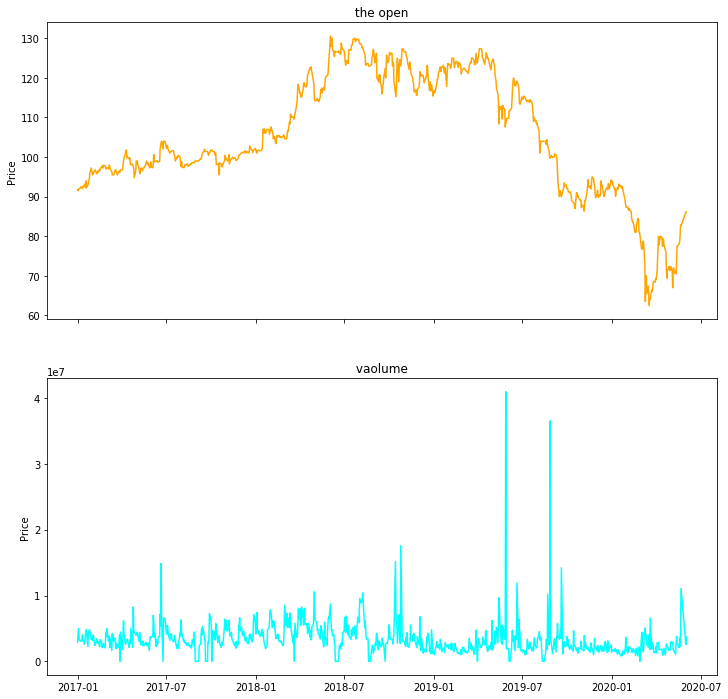

In [6]:
fig , (ax,ax2) = plt.subplots(nrows = 2,figsize=(12,12),sharex=True)
ax.plot(sabic.index,sabic['Open'],color='orange',);
ax2.plot(sabic.index,sabic['Volume'],color='cyan');
ax.set(title=' the open ',ylabel='Price')
ax2.set(title=' vaolume ',ylabel='Price')

### Comments 
* Sabic has the highes open prices perdate also it has the highes volue compare to other to company.However is this information enough to make us invest in sabic.

#### When did the highes open price and volume occur ? 

In [8]:
sabic.index[623],sabic.index[366]

(Timestamp('2019-05-28 00:00:00'), Timestamp('2018-06-03 00:00:00'))

## Create the total traded
> The total mony traded is to see how much total market cap of the company not just the stock price , We don't have this information in our data frame. Therefore we need to create new columns we will call it total tradded . To callculate this we will multiply the volume by open price **NOTE** this is not accurate. 

In [9]:
sabic['total traded'] = sabic['Volume']*sabic['Open']
almsafi['total traded'] = almsafi['Volume']*almsafi['Open']
ynsab['total traded'] = ynsab['Volume']*ynsab['Open']




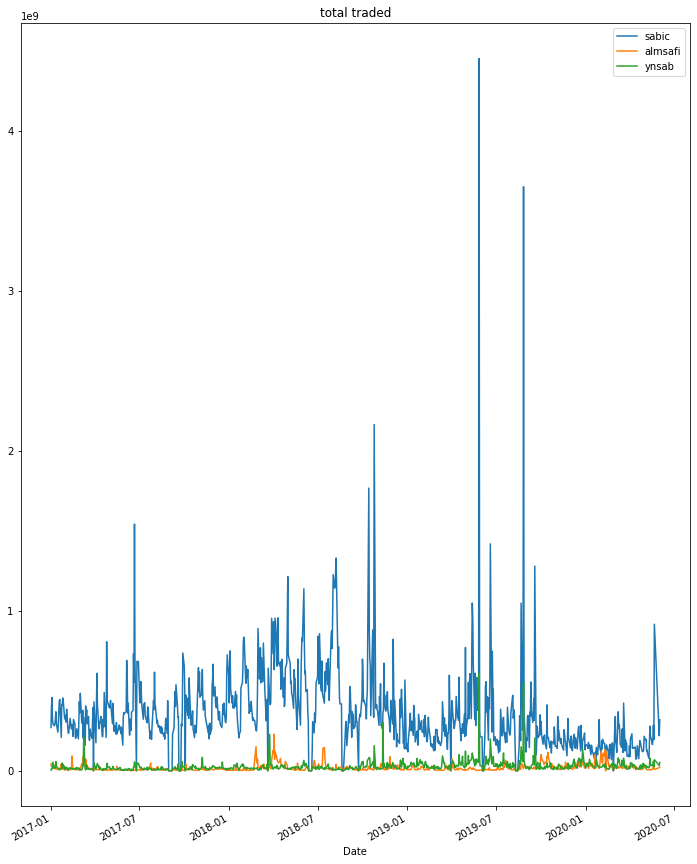

In [10]:
sabic['total traded'].plot(label='sabic',figsize=(12,16),title = 'total traded ')
almsafi['total traded'].plot(label='almsafi',figsize=(12,16),title = 'total traded ')
ynsab['total traded'].plot(label='ynsab',figsize=(12,16),title = 'total traded');
plt.legend();

* There is a ahuge amount of mony ennter in sabic in 2019 at the end of the 5 month 
* what was the data and what happens at that date ?
> There is nothing in the news that show why this amount of mony enter sabic.

In [11]:
# the date 
sabic.index[sabic['total traded'].argmax()], sabic['total traded'].max()

(Timestamp('2019-05-28 00:00:00'), 4450620268.06678)

### Plotting some MA (moving avearges)
> A moving average (MA) is a stock indicator that is commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data over a specified period of time by creating a constantly updated average price.

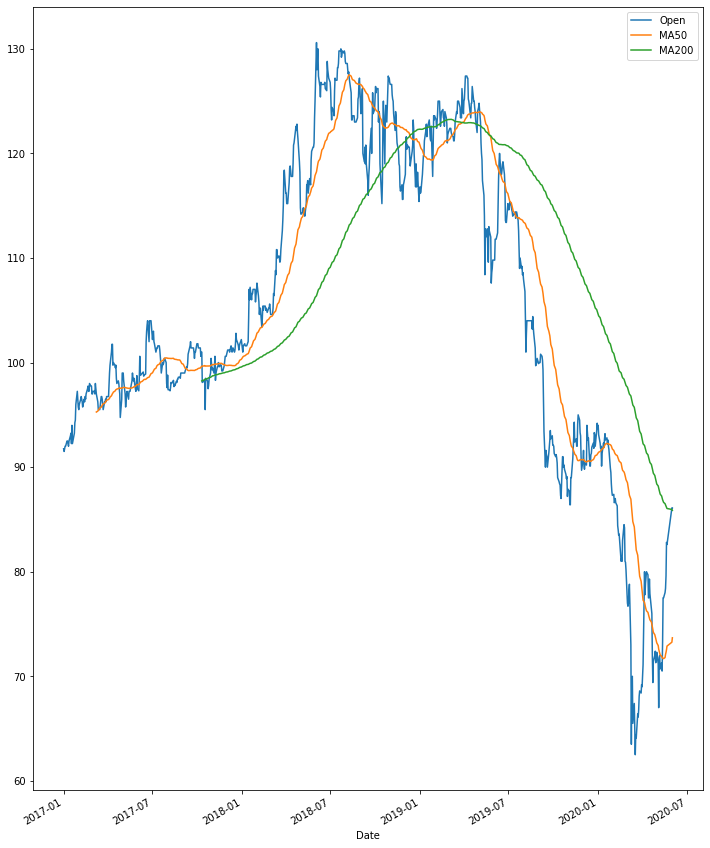

In [12]:
# Code here 
sabic['MA50'] = sabic['Open'].rolling(50).mean()
sabic['MA200'] = sabic['Open'].rolling(200).mean()
sabic[['Open','MA50','MA200']].plot(figsize=(12,16));



## see if there is a relation between thees stocks 

In [13]:
from pandas.plotting import scatter_matrix

In [14]:
petro_comp = pd.concat([sabic['Open'],almsafi['Open'],ynsab['Open']],axis=1)
petro_comp.columns= ['sabic_open','almsafi_open','ynsab_open']
petro_comp

,sabic_open,almsafi_open,ynsab_open
Date,,,
2017-01-01,91.750000,40.200001,54.00
2017-01-02,91.500000,40.200001,54.50
2017-01-03,91.750000,39.900002,54.75
2017-01-04,92.000000,40.000000,54.25
2017-01-05,92.000000,39.599998,54.75
...,...,...,...
2020-05-19,79.599998,32.700001,50.50
2020-05-20,82.800003,33.500000,50.50
2020-05-21,82.599998,33.250000,51.00


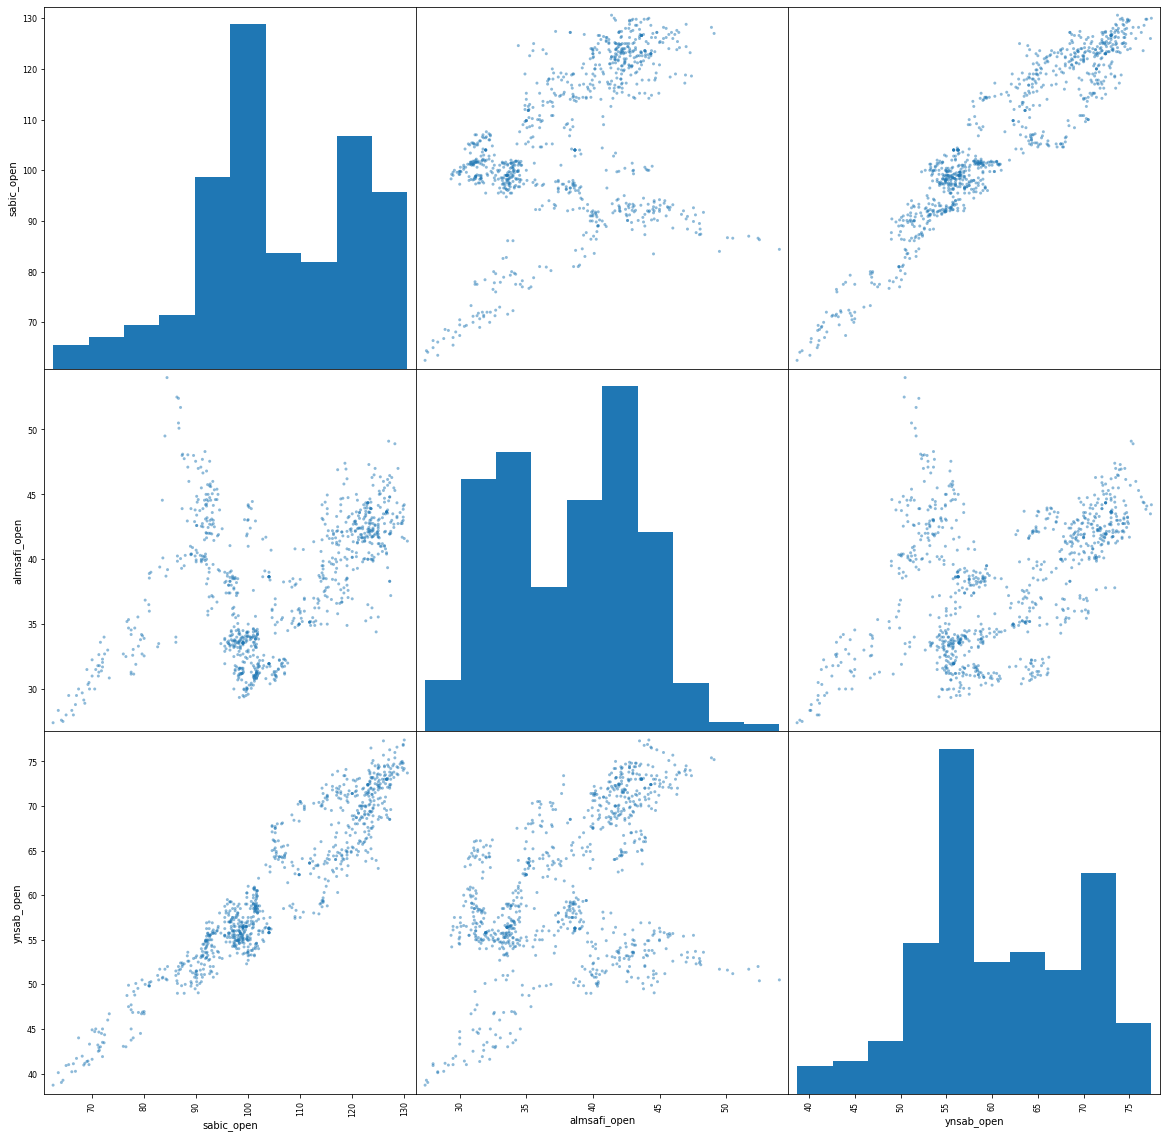

In [15]:
scatter_matrix(petro_comp,figsize=(20,20));

### There is alinear positve relation between sabic and ynsab which makes since because all of them in petrochemchal. 

* create a candle stick chart 

In [40]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,SUNDAY

In [17]:
sabic_reset = sabic.loc['2020-05'].reset_index()

In [18]:
sabic_reset['date_ax']= sabic_reset['Date'].apply(lambda date: date2num(date))

In [19]:
lisit_cols = ['date_ax','Open','High','Low','Close']

sabic_vals =[tuple(vals) for vals in sabic_reset[lisit_cols].values]

In [20]:
sabic_vals

[(737548.0, 71.19999694824219, 71.30000305175781, 68.69999694824219, 69.0),
 (737549.0, 67.0, 71.30000305175781, 67.0, 69.0),
 (737550.0, 71.80000305175781, 71.80000305175781, 70.5, 70.9000015258789),
 (737551.0, 72.0, 72.80000305175781, 70.69999694824219, 70.69999694824219),
 (737552.0,
  70.69999694824219,
  71.5999984741211,
  70.19999694824219,
  70.80000305175781),
 (737555.0,
  71.30000305175781,
  72.19999694824219,
  71.0999984741211,
  71.69999694824219),
 (737556.0, 70.5, 73.4000015258789, 70.0, 73.0),
 (737557.0, 73.30000305175781, 76.30000305175781, 73.30000305175781, 76.0),
 (737558.0, 77.5, 78.4000015258789, 77.30000305175781, 77.69999694824219),
 (737559.0, 77.5, 77.5, 75.5999984741211, 76.0),
 (737562.0, 78.0, 78.4000015258789, 77.5, 77.9000015258789),
 (737563.0, 78.4000015258789, 79.5, 78.0999984741211, 79.5),
 (737564.0, 79.5999984741211, 83.0, 79.5999984741211, 82.0),
 (737565.0, 82.80000305175781, 83.30000305175781, 81.19999694824219, 82.0),
 (737566.0, 82.59999847

In [21]:
sundays = WeekdayLocator(SUNDAY)
alldays = DayLocator()
weekformatter = DateFormatter('%b' '%d') # eg  jan 12 
dayformatter = DateFormatter('%d') # e,g 12


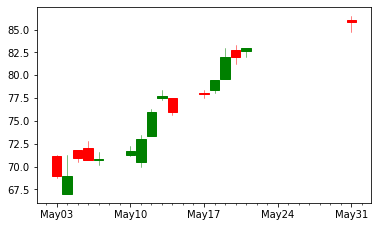

In [22]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(sundays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekformatter)
candlestick_ohlc(ax,sabic_vals,width=0.9,colorup ='g',colordown='r');

 ## Basic information Analysis  
* first we will begin callculatin the daily percentage change 
* rt = pt/pt-1  -1

Percentage change can be applied to any quantity that you measure over time. Let's say you are tracking the quoted price of a security. If the price increased, use the formula [(New Price - Old Price)/Old Price] and then multiply that number by 100. If the price decreased, use the formula [(Old Price - New Price)/Old Price] and multiply that number by 100. 
This formula is used both to track the prices of individual securities and of large market indexes, as well as comparing the values of different currencies. Balance sheets with comparative financial statements will generally include the prices of specific assets at different points in time along with the percentage changes over the accompanying periods of time. 

In [23]:
sabic['returns']= sabic['Close'].pct_change(1)

In [24]:
almsafi['returns']= almsafi['Close'].pct_change(1)
ynsab['retuns']= ynsab['Close'].pct_change(1)

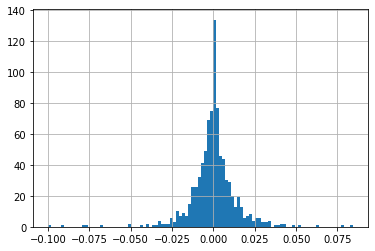

In [25]:
sabic['returns'].hist(bins=100)

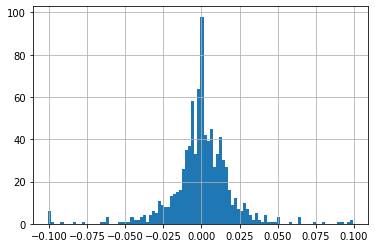

In [26]:
almsafi['returns'].hist(bins=100)

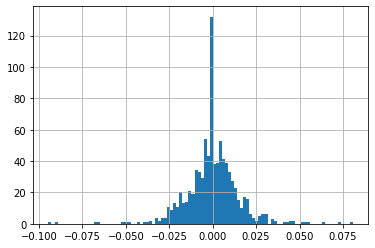

In [27]:
ynsab['retuns'].hist(bins=100)

 * We can see almsfi is more voltie since the range of the reyrns value is the highest 

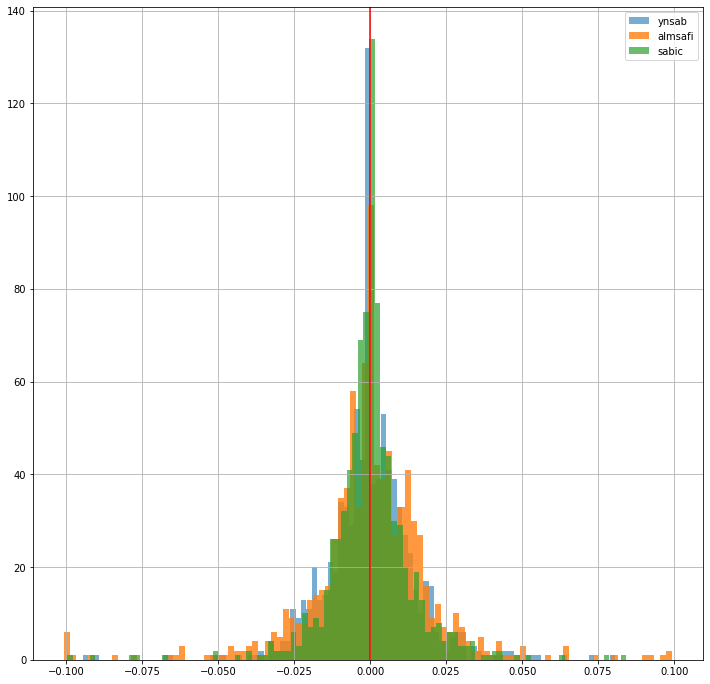

In [28]:
ynsab['retuns'].hist(bins=100,figsize=(12,12),label='ynsab',alpha=0.6)
almsafi['returns'].hist(bins=100,figsize=(12,12),label='almsafi',alpha=0.8)
sabic['returns'].hist(bins=100,figsize=(12,12),label='sabic',alpha=0.7);
plt.axvline(color='r')
plt.legend();

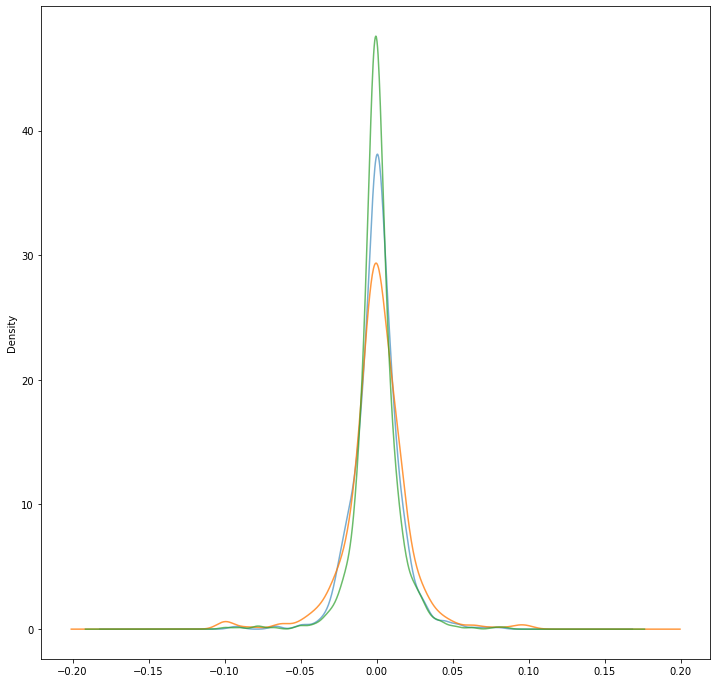

In [29]:
# more clear than the hist 
ynsab['retuns'].plot(kind='kde',figsize=(12,12),label='ynsab',alpha=0.6)
almsafi['returns'].plot(kind='kde',figsize=(12,12),label='almsafi',alpha=0.8)
sabic['returns'].plot(kind='kde',figsize=(12,12),label='sabic',alpha=0.7);

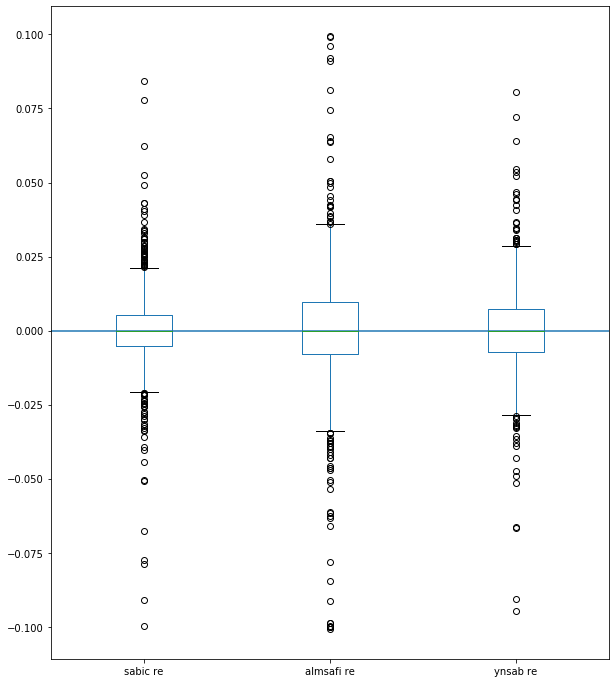

In [30]:
# try bob plot 
box_df = pd.concat([sabic['returns'],almsafi['returns'],ynsab['retuns']],axis=1)

box_df.columns = ['sabic re','almsafi re', 'ynsab re']

box_df.plot(kind='box',figsize=(10,12));
plt.axhline()

### Coments 
> We can see from the above plots that the almsafi is more flexable than sabic and ynsab because it the range of the return is larger
than than in the otheres. This indicates, the invesment in almsafis is more risky it could be getting you great profit or great lose 
.Un like in sabic and ynsab it is mostly strady.

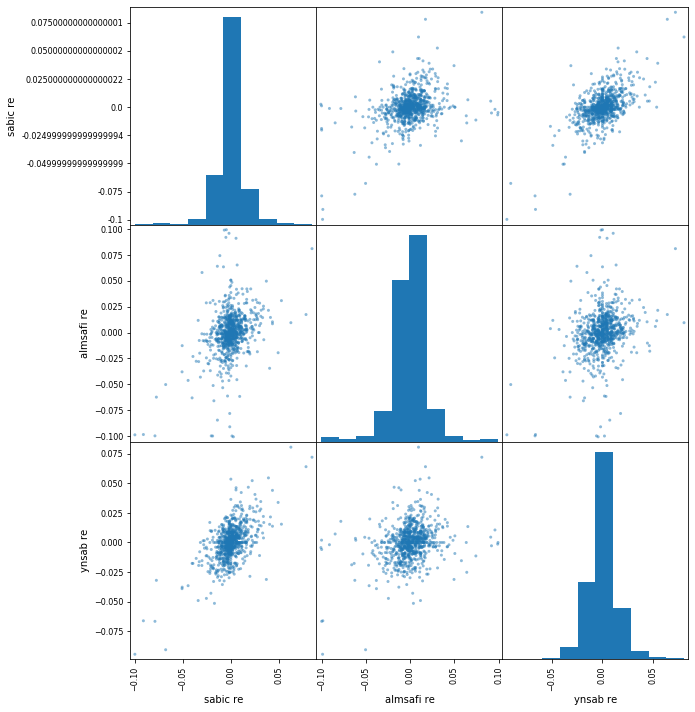

In [31]:
scatter_matrix(box_df,figsize=(10,12));

## looks like sabic and ynsab have linear realation

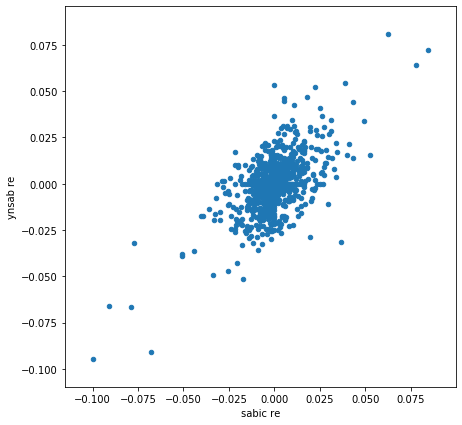

In [32]:
box_df.plot(kind='scatter',figsize=(7,7),x='sabic re',y='ynsab re');

### Create cummultive return 
> In the cummulitive return . the callcualtin will happen in the all previous returns and it is used to indicate whether you will lose or profit if you decide to sell the stocks at specific date . The callcaultion will happen from the day that you buy the stocks untill the day you decide to buy the stocks. So, If the cummultive return is positive ypu will be profitable and if it is negative you will be lose so it is better to delay the sell descion.

In [33]:
sabic['cummultive return ']= (1+ sabic['returns']).cumprod()
almsafi['cummultive return ']= (1+ almsafi['returns']).cumprod()
ynsab['cummultive return ']= (1+ ynsab['retuns']).cumprod()

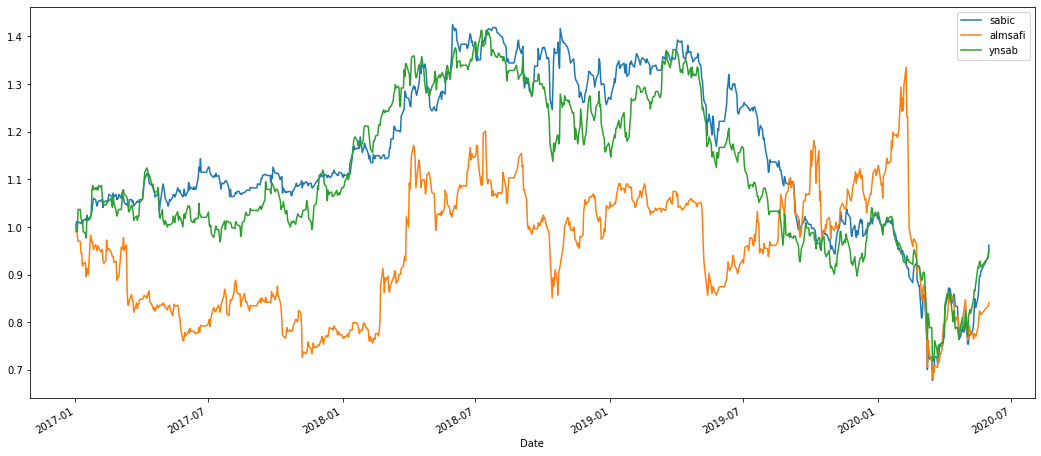

In [34]:
sabic['cummultive return '].plot(label='sabic',figsize=(18,8))
almsafi['cummultive return '].plot(label='almsafi',figsize=(18,8))
ynsab['cummultive return '].plot(label='ynsab',figsize=(18,8))
plt.legend();